<a href="https://colab.research.google.com/github/Qasaiemh/Quality_Supply_Chain_Assignment/blob/Q.1.2/Q_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Question – 1 2.Which product family produces higher number of defective parts? (Defect - Any unit with
# measurement greater than upper limit) – Please demonstrate using a pareto chart

In [2]:
import pandas as pd
import sqlite3

# Step 1: Load each sheet of the Excel file into separate Pandas DataFrames
excel_file_path = '/content/question_1_2.xlsx'
all_tables_data = pd.read_excel(excel_file_path, sheet_name=None)

# Step 2: Connect to an SQLite database
db_path = 'supply_chain_database.db'
conn = sqlite3.connect(db_path)

# Step 3: Write each DataFrame to a separate table in the SQLite database
for sheet_name, df in all_tables_data.items():
    table_name = sheet_name.replace(" ", "_")  # Replace any spaces in sheet names with underscores
    df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()


In [3]:
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Step 2: Get the list of table names in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Step 3: Print the contents of each table
for table_name in table_names:
    table_name = table_name[0]
    print(f"Table: {table_name}")
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    print(df)
    print("\n")

# Step 4: Close the connection to the database
conn.close()


Table: Specifications
  Product Code    T_Name     LSL     USL  Target
0     LIF001_B  T_height    7.22   10.57    8.78
1     LIF001_Y  T_height    6.78   10.07    8.36
2     LIF002_R  T_height    7.22   10.57    8.78
3     LIF002_Y  T_height    6.78   10.07    8.36
4     LIF001_B  T_weight  360.00  470.00  410.00
5     LIF001_Y  T_weight  329.00  500.00  410.00
6     LIF002_R  T_weight  329.00  500.00  385.00
7     LIF002_Y  T_weight  329.00  500.00  410.00


Table: Production_Sequence
   Order ID                 Date Product Family Variant
0         1  2022-05-14 00:00:00         LIF001       B
1         2  2022-06-02 00:00:00         LIF001       Y
2         3  2022-06-17 00:00:00         LIF001       B
3         4  2022-07-01 00:00:00         LIF003       B
4         5  2022-07-17 00:00:00         LIF002       R
5         6  2022-08-05 00:00:00         LIF002       Y
6         7  2022-08-19 00:00:00         LIF002       G
7         8  2022-09-01 00:00:00         LIF001       G
8   

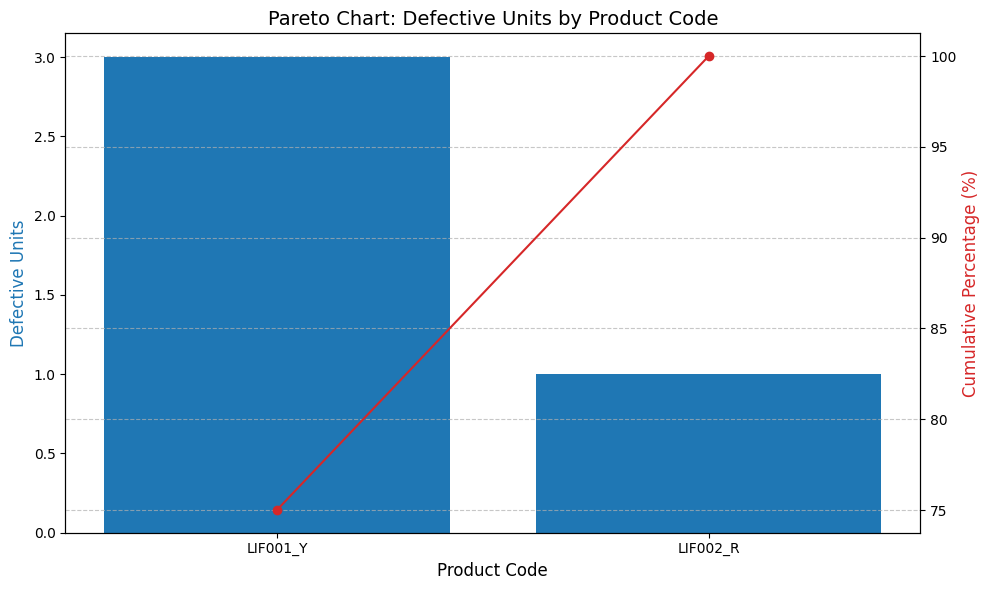

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Step 2: Query data from the "Measurements" and "Specifications" tables
query_measurements = "SELECT * FROM Measurements"
query_specifications = "SELECT * FROM Specifications"

df_measurements = pd.read_sql_query(query_measurements, conn)
df_specifications = pd.read_sql_query(query_specifications, conn)

# Step 3: Check for duplicates in the dataframes (optional)
if df_measurements.duplicated().any() or df_specifications.duplicated().any():
    print("Warning: Duplicate rows found in data. Removing duplicates...")
    df_measurements.drop_duplicates(inplace=True)
    df_specifications.drop_duplicates(inplace=True)

# Step 4: Merge the "Measurements" and "Specifications" tables on "Product Code"
merged_df = df_measurements.merge(df_specifications, on='Product Code', how='inner')

# Step 5: Identify defective units (units with measurements greater than USL)
defective_units = merged_df[merged_df['T_Height'] > merged_df['USL']]

# Step 6: Calculate the count of defective units for each product family
defective_counts = defective_units['Product Code'].value_counts().reset_index()
defective_counts.columns = ['Product Code', 'Defective Units']

# Step 7: Sort the product families based on the count of defective units in descending order
defective_counts = defective_counts.sort_values(by='Defective Units', ascending=False)

# Step 8: Calculate the cumulative percentage of defective units
defective_counts['Cumulative Percentage'] = (defective_counts['Defective Units'].cumsum() / defective_counts['Defective Units'].sum()) * 100

# Step 9: Plot the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(defective_counts['Product Code'], defective_counts['Defective Units'], color='tab:blue')
ax1.set_xlabel('Product Code', fontsize=12)
ax1.set_ylabel('Defective Units', color='tab:blue', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(defective_counts['Product Code'], defective_counts['Cumulative Percentage'], color='tab:red', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='tab:red', fontsize=12)

plt.title('Pareto Chart: Defective Units by Product Code', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the connection to the database
conn.close()
